Spaceship Titanic
---

[Kaggle Competition](https://www.kaggle.com/competitions/spaceship-titanic)

>Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.

>The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

>While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!



>To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

>Help save them and change history!


>Submissions are evaluated based on their classification accuracy, the percentage of predicted labels that are correct.

>Submission Format
>The submission format for the competition is a csv file with the following format:

| PassengerId | Transported |
| --- | --- |
|0013_01|False|
|0018_01|False|
|0019_01|False|
|0021_01|False|
etc.


File and Data Field Descriptions
---
### `train.csv` 
Personal records for about two-thirds (~8700) of the passengers, to be used as training data.

`PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

`Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

`Destination` - The planet the passenger will be debarking to.

`Age` - The age of the passenger.

`VIP` - Whether the passenger has paid for special VIP service during the voyage.

`RoomService, FoodCourt, ShoppingMall, Spa, VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

`Name` - The first and last names of the passenger.

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

---
### `test.csv` 
Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

---
### `sample_submission.csv`
A submission file in the correct format.

`PassengerId` - Id for each passenger in the test set.

`Transported` - The target. For each passenger, predict either True or False.

In [375]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

pd.options.display.max_columns = 30

import tensorflow as tf
import keras

In [378]:
#import data
data_directory = './data/'

df_train = pd.read_csv(data_directory + 'train.csv')
df_train.set_index('PassengerId', inplace=True, drop = False)
df_test = pd.read_csv( data_directory + 'test.csv')
df_test.set_index('PassengerId', inplace=True, drop = False)
df_example = pd.read_csv(data_directory + 'sample_submission.csv')
df = pd.concat([df_train, df_test], ignore_index=True)
df.set_index('PassengerId', inplace = True, drop = False)

In [379]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,,
0001_01,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   12970 non-null  object 
 1   HomePlanet    12682 non-null  object 
 2   CryoSleep     12660 non-null  object 
 3   Cabin         12671 non-null  object 
 4   Destination   12696 non-null  object 
 5   Age           12700 non-null  float64
 6   VIP           12674 non-null  object 
 7   RoomService   12707 non-null  float64
 8   FoodCourt     12681 non-null  float64
 9   ShoppingMall  12664 non-null  float64
 10  Spa           12686 non-null  float64
 11  VRDeck        12702 non-null  float64
 12  Name          12676 non-null  object 
 13  Transported   8693 non-null   object 
dtypes: float64(6), object(8)
memory usage: 1.4+ MB


---
# PassengerID

> A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

In [7]:
#no duplicate ids
df['PassengerId'].duplicated().sum()

0

In [8]:
#no null ids
df['PassengerId'].isna().sum()

0

In [9]:
# do all ids adhere to the format gggg_pp
df['PassengerId_format_ok'] = df['PassengerId'].apply(lambda this_id: int(this_id[:4]) < 10000 and int(this_id[-2:]) < 100 and this_id[4] == '_')

In [10]:
#all Ids are good.
df['PassengerId_format_ok'].value_counts()

True    12970
Name: PassengerId_format_ok, dtype: int64

In [11]:
#make column for passenger group
df['Group'] = df['PassengerId'].apply(lambda this_id: int(this_id[:4]))

In [12]:
#make column for passenger number in group
df['GroupRank'] = df['PassengerId'].apply(lambda this_id: this_id[-2:])

### Group

<BarContainer object of 8 artists>

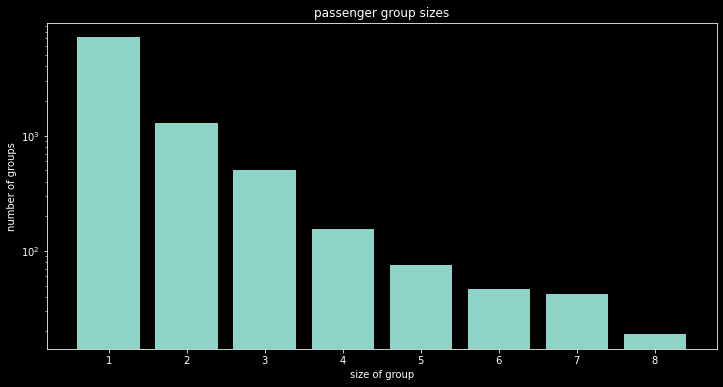

In [13]:
#group sizes
group_value_counts = df['Group'].value_counts()
df['GroupSize'] = df['Group'].apply(lambda this_group: int(group_value_counts[this_group]) )

plt.figure(figsize = (12,6))
plt.title('passenger group sizes')
plt.xlabel('size of group')
plt.ylabel('number of groups')
sizes = df['Group'].value_counts().value_counts().values
plt.bar(height = sizes, x= range(1,9), log = True)

In [14]:
# how are groups numbered?
group_size_corr = df[['Group', "GroupSize"]].corr()
group_size_corr

,Group,GroupSize
Group,1.000000,0.007881
GroupSize,0.007881,1.000000


The group size is not related to the group number.

<AxesSubplot:xlabel='Group', ylabel='GroupSize'>

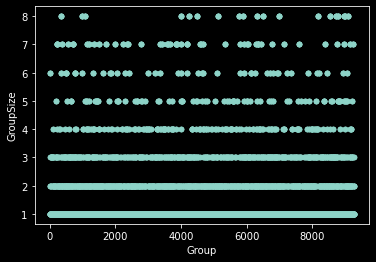

In [15]:
#group size with group number scatter
df.plot(x = 'Group', y = 'GroupSize', kind = 'scatter')

Text(0.5, 1.0, 'group number with index')

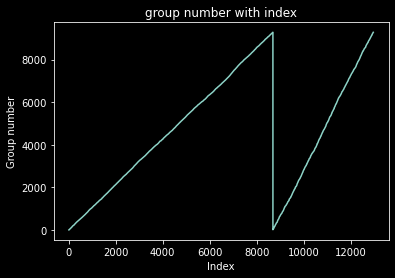

In [16]:
df['Group'].plot()
plt.xlabel("Index")
plt.ylabel('Group number')
plt.title("group number with index")

Passenger indices appear to be assigned by group number. The second ramp is the test set.

### GroupRank
The majority of groups are single passengers.

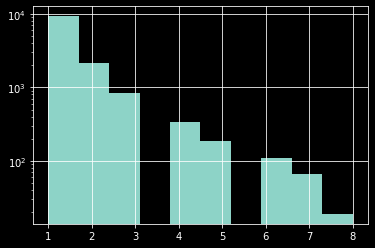

In [17]:
#make grouprank a number
df['GroupRank'] = df['GroupRank'].apply(lambda this_rank: int(this_rank))
df['GroupRank'].hist(log = True);

In [18]:
df['GroupRank'].value_counts('normdsa')

1    0.715497
2    0.164611
3    0.064765
4    0.026060
5    0.014187
6    0.008327
7    0.005089
8    0.001465
Name: GroupRank, dtype: float64

---
# HomePlanet

In [19]:
df['HomePlanet'].value_counts('n')

Earth     0.541318
Europa    0.247043
Mars      0.211639
Name: HomePlanet, dtype: float64

### CryoSleep by HomePlanet
Europans, then Martians, then Terrans are order of most likely to be in cryosleep.

In [20]:
df[df['HomePlanet'] == 'Earth']['CryoSleep'].value_counts('n')

False    0.691137
True     0.308863
Name: CryoSleep, dtype: float64

In [21]:
df[df['HomePlanet'] == 'Europa']['CryoSleep'].value_counts('n')

False    0.549803
True     0.450197
Name: CryoSleep, dtype: float64

In [22]:
df[df['HomePlanet'] == 'Mars']['CryoSleep'].value_counts('n')

False    0.605795
True     0.394205
Name: CryoSleep, dtype: float64

### VIP by HomePlanet

No VIPs come from Earth. About twice as many from Europa as Mars.

In [23]:
df[df['HomePlanet'] == 'Earth']['VIP'].mean()

0.0

In [24]:
df[df['HomePlanet'] == 'Europa']['VIP'].mean()

0.05784313725490196

In [25]:
df[df['HomePlanet'] == 'Mars']['VIP'].mean()

0.03431185665268776

# CryoSleep

In [26]:
df['CryoSleep'].value_counts('n')

False    0.638152
True     0.361848
Name: CryoSleep, dtype: float64

In [27]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'PassengerId_format_ok', 'Group', 'GroupRank',
       'GroupSize'],
      dtype='object')

# Cabin

In [28]:
df['Cabin'].head(10)

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
5    F/0/P
6    F/2/S
7    G/0/S
8    F/3/S
9    B/1/P
Name: Cabin, dtype: object

In [29]:
df[df['Cabin'].isna()]['VIP'].mean()

0.024305555555555556

In [30]:
df['VIP'].mean()

0.021540160959444533

In [31]:
#Split cabin into deck / number / side

In [32]:
df['Cabin_deck'] = df['Cabin'].apply(lambda this_cabin: this_cabin.split('/')[0] if type(this_cabin) == str else np.nan)
df['Cabin_number'] = df['Cabin'].apply(lambda this_cabin: int(this_cabin.split('/')[1]) if type(this_cabin) == str else np.nan)
df['Cabin_side'] = df['Cabin'].apply(lambda this_cabin: this_cabin.split('/')[2] if type(this_cabin) == str else np.nan)

### Cabin_side

In [33]:
df['Cabin_side'].value_counts('n')

S    0.503591
P    0.496409
Name: Cabin_side, dtype: float64

### Cabin deck

<AxesSubplot:>

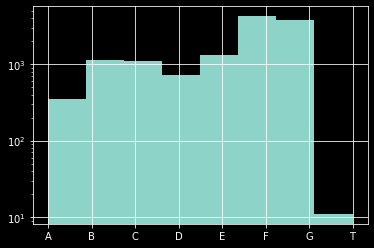

In [34]:
df['Cabin_deck'].sort_values().hist(bins = 8, log = True)

In [35]:
# who is staying in the T deck?
df[df['Cabin_deck'] == 'T']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerId_format_ok,Group,GroupRank,GroupSize,Cabin_deck,Cabin_number,Cabin_side
1004,1071_01,NaN,False,T/0/P,TRAPPIST-1e,35.0,False,415.0,1328.0,0.0,14.0,60.0,Alraida Dingauge,False,True,1071,1,1,T,0.0,P
2254,2414_01,Europa,False,T/1/P,TRAPPIST-1e,42.0,False,0.0,1829.0,2.0,3133.0,2447.0,Mergak Headfair,False,True,2414,1,1,T,1.0,P
2734,2935_01,Europa,False,T/2/P,TRAPPIST-1e,33.0,False,0.0,28.0,0.0,6841.0,543.0,NaN,False,True,2935,1,1,T,2.0,P
2763,2971_01,Europa,False,T/3/P,TRAPPIST-1e,38.0,False,0.0,3135.0,0.0,26.0,3.0,Pent Sessiouse,True,True,2971,1,1,T,3.0,P
4565,4863_01,Europa,NaN,T/2/S,TRAPPIST-1e,37.0,False,1721.0,667.0,NaN,28.0,1362.0,Phacton Unsible,False,True,4863,1,1,T,2.0,S
8937,0524_01,Europa,False,T/0/S,TRAPPIST-1e,35.0,False,0.0,6442.0,672.0,238.0,60.0,Tabius Frogauded,NaN,True,524,1,1,T,0.0,S
9744,2217_01,Europa,False,T/1/S,TRAPPIST-1e,26.0,False,132.0,2576.0,0.0,2060.0,3.0,Alarmus Brantcable,NaN,True,2217,1,1,T,1.0,S
10187,3208_01,Europa,False,T/4/P,TRAPPIST-1e,27.0,False,0.0,11293.0,0.0,297.0,4736.0,Thabius Reeddommy,NaN,True,3208,1,1,T,4.0,P
11904,7046_01,Europa,False,T/3/S,55 Cancri e,27.0,NaN,6.0,400.0,0.0,6472.0,0.0,Tope Ativeezy,NaN,True,7046,1,3,T,3.0,S
11905,7046_02,Europa,False,T/3/S,55 Cancri e,44.0,False,0.0,1190.0,0.0,1906.0,167.0,Genubih Ativeezy,NaN,True,7046,2,3,T,3.0,S


In [36]:
# What is the size of each deck?
df.groupby(by = ['Cabin_deck', 'Cabin_side']).count()

PassengerId  HomePlanet  CryoSleep  Cabin  Destination  \
Cabin_deck Cabin_side                                                           
A          P                   166         161        162    166          163   
           S                   188         185        182    188          186   
B          P                   512         505        501    512          500   
           S                   629         619        613    629          618   
C          P                   533         528        521    533          517   
           S                   569         553        552    569          564   
D          P                   370         358        362    370          364   
           S                   350         344        345    350          341   
E          P                   641         628        624    641          629   
           S                   682         660        668    682          659   
F          P                  2178        2130       2119   2178         2133   
           S                  2061        2009       2020   2061         2010   
G          P                  1885        1848       1837   1885         1845   
           S                  1896        1852       1855   1896         1861   
T          P                     5           4          5      5            5   
           S                     6           6          5      6            6   

                        Age   VIP  RoomService  FoodCourt  ShoppingMall   Spa  \
Cabin_deck Cabin_side                                                           
A          P            160   162          163        165           162   165   
           S            184   182          184        187           183   186   
B          P            504   499          502        504           497   506   
           S            613   617          618        616           616   611   
C          P            519   520          523        515           518   520   
           S            559   553          562        556           555   554   
D          P            361   366          364        362           361   362   
           S            344   341          342        341           346   337   
E          P            627   626          627        626           628   628   
           S            669   674          666        670           666   666   
F          P           2135  2131         2128       2133          2133  2127   
           S           2023  2012         2026       2012          2019  2020   
G          P           1845  1838         1835       1847          1828  1848   
           S           1852  1855         1861       1845          1848  1849   
T          P              5     5            5          5             5     5   
           S              6     5            6          6             5     6   

                       VRDeck  Name  Transported  PassengerId_format_ok  \
Cabin_deck Cabin_side                                                     
A          P              163   162          117                    166   
           S              185   184          139                    188   
B          P              501   500          353                    512   
           S              622   617          426                    629   
C          P              524   524          341                    533   
           S              559   560          406                    569   
D          P              360   357          248                    370   
           S              343   346          230                    350   
E          P              630   628          429                    641   
           S              671   669          447                    682   
F          P             2130  2128         1438                   2178   
           S             2016  2009         1356                   2061   
G          P             1851  1841         1276       

### Cabin_number

<AxesSubplot:>

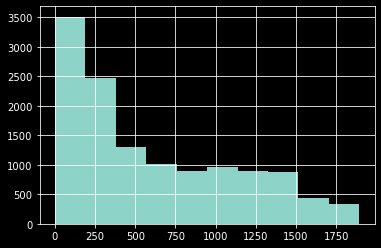

In [37]:
df['Cabin_number'].hist()

# Destination

In [38]:
df['Destination'].value_counts('n')

TRAPPIST-1e      0.698724
55 Cancri e      0.208018
PSO J318.5-22    0.093258
Name: Destination, dtype: float64

# Age

<AxesSubplot:>

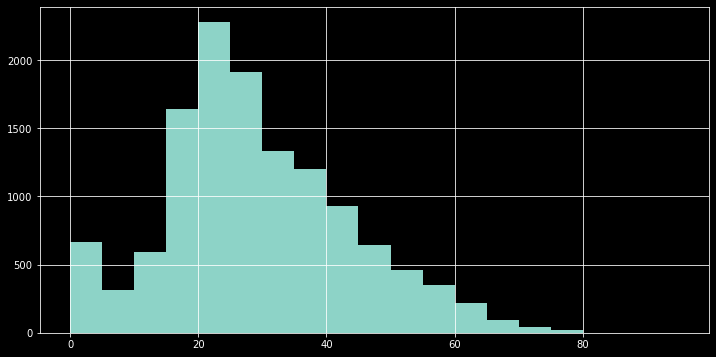

In [39]:
df['Age'].hist(bins = range(0,100,5), figsize = (12,6))

# VIP

In [40]:
df['VIP'].value_counts()

False    12401
True       273
Name: VIP, dtype: int64

# RoomService

<AxesSubplot:>

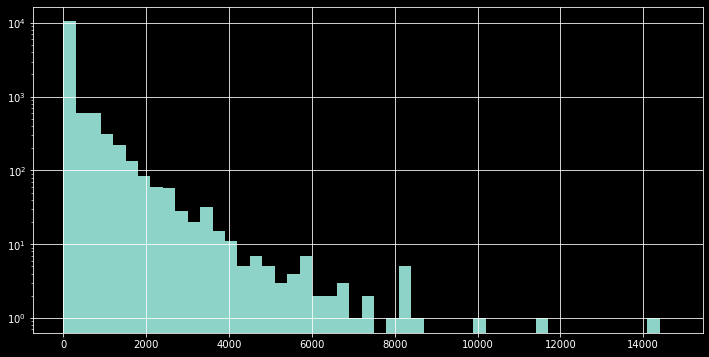

In [41]:
df['RoomService'].hist(bins = range(0,15000,300), log = True, figsize = (12,6))

# FoodCourt

<AxesSubplot:>

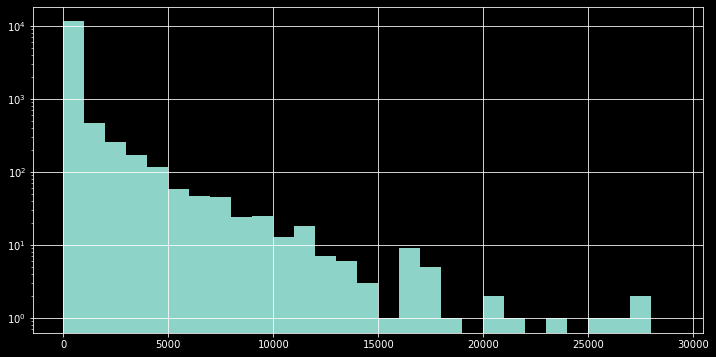

In [42]:
df['FoodCourt'].hist(bins = range(0,30000,1000), log = True, figsize = (12,6))

# ShoppingMall

<AxesSubplot:>

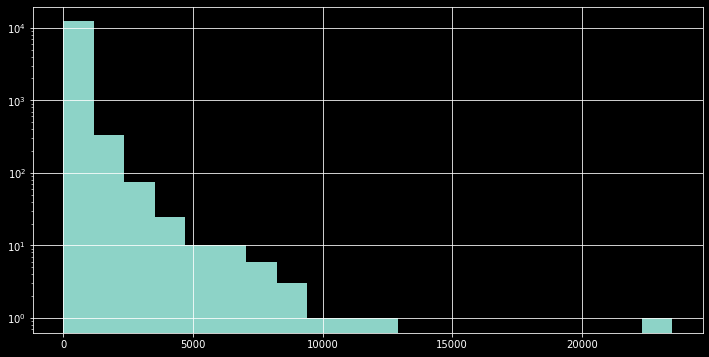

In [43]:
df['ShoppingMall'].hist(bins = 20, log = True, figsize = (12,6))

# Spa

<AxesSubplot:>

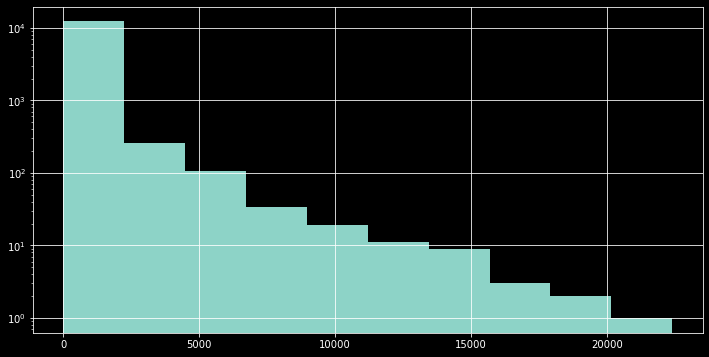

In [44]:
df['Spa'].hist(figsize = (12,6), log = True)

# Total Purchases

The sum of amenities

In [45]:
# make a new column
df['Total_purchases'] = df['RoomService'] + df['FoodCourt'] + df['ShoppingMall'] + df['Spa'] + df['VRDeck']

<AxesSubplot:>

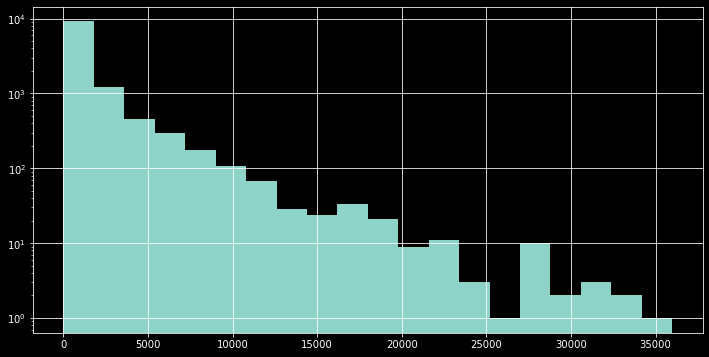

In [46]:
df['Total_purchases'].hist(bins = 20, log = True, figsize = (12,6))

# Name

In [47]:
df['Name']

0          Maham Ofracculy
1             Juanna Vines
2            Altark Susent
3             Solam Susent
4        Willy Santantines
               ...        
12965          Jeron Peter
12966        Matty Scheron
12967          Jayrin Pore
12968       Kitakan Conale
12969     Lilace Leonzaley
Name: Name, Length: 12970, dtype: object

### name length, number of name parts

Everyone has a first and last name.

In [48]:
df['Name_length'] = df['Name'].apply(lambda this_name: len(this_name.split()) if type(this_name) == str else np.nan)

In [49]:
df['Name_length'].value_counts()

2.0    12676
Name: Name_length, dtype: int64

In [50]:
df['first_name'] = df['Name'].apply(lambda this_name: this_name.split()[0] if type(this_name) == str else np.nan)
df['second_name'] = df['Name'].apply(lambda this_name: this_name.split()[1] if type(this_name) == str else np.nan)

df['first_name_length'] = df['first_name'].apply(lambda this_name: len(this_name) if type(this_name) ==  str else np.nan)
df['second_name_length'] = df['second_name'].apply(lambda this_name: len(this_name) if type(this_name) == str else np.nan)

Text(0.5, 1.0, 'first name lengths')

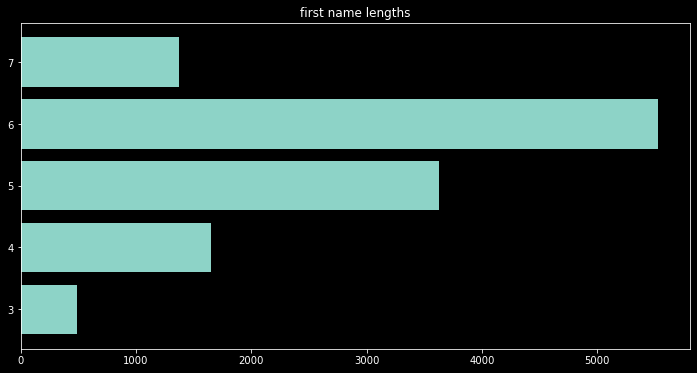

In [51]:
plt.figure(figsize = (12,6))
plt.barh(y=df['first_name_length'].value_counts().index, width = df['first_name_length'].value_counts())
plt.title("first name lengths")

Text(0.5, 1.0, 'second name lengths')

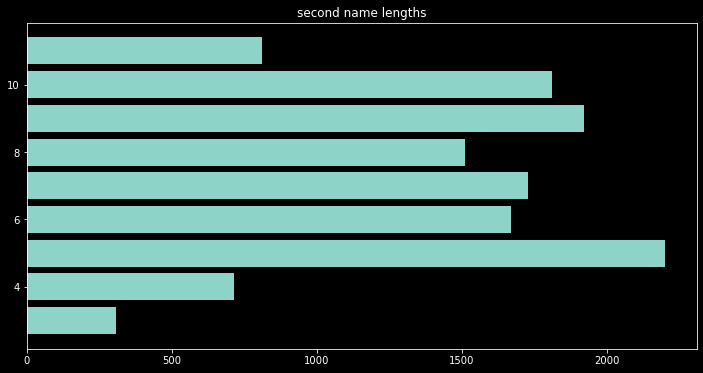

In [52]:
plt.figure(figsize = (12,6))
plt.barh(y=df['second_name_length'].value_counts().index, width = df['second_name_length'].value_counts())
plt.title("second name lengths")

In [53]:
#they are weakly correlated.
df[['first_name_length', 'second_name_length']].corr()

,first_name_length,second_name_length
first_name_length,1.000000,0.219705
second_name_length,0.219705,1.000000


### num_vowels

In [54]:
# df['first_name_vowels'] = df['first_name'].apply()
# df['second_name_vowels'] = df['first_name'].apply()

### num_syllables

# Transported
Almost exactly half of the training set were transported.

In [157]:
df['Transported'].value_counts('d')

True     0.503624
False    0.496376
Name: Transported, dtype: float64

In [158]:
df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,PassengerId_format_ok,Group,GroupRank,GroupSize,Cabin_deck,Cabin_number,Cabin_side,Total_purchases,Name_length,first_name,second_name,first_name_length,second_name_length
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,True,1,1,1,B,0.0,P,0.0,2.0,Maham,Ofracculy,5.0,9.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,True,2,1,1,F,0.0,S,736.0,2.0,Juanna,Vines,6.0,5.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,True,3,1,2,A,0.0,S,10383.0,2.0,Altark,Susent,6.0,6.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,True,3,2,2,A,0.0,S,5176.0,2.0,Solam,Susent,5.0,6.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,True,4,1,1,F,1.0,S,1091.0,2.0,Willy,Santantines,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,NaN,True,9266,2,2,G,1496.0,S,0.0,2.0,Jeron,Peter,5.0,5.0
12966,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,True,9269,1,1,NaN,NaN,NaN,1018.0,2.0,Matty,Scheron,5.0,7.0
12967,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,NaN,True,9271,1,1,D,296.0,P,0.0,2.0,Jayrin,Pore,6.0,4.0
12968,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,NaN,True,9273,1,1,D,297.0,P,3203.0,2.0,Kitakan,Conale,7.0,6.0


TTS
---

Just a first step.

In [162]:
logitdf = pd.get_dummies(df, columns = ['Destination', 'HomePlanet','Cabin_deck', 'Cabin_side'], drop_first = True).drop(columns = ['PassengerId', 'Cabin', 'Name', 'first_name', 'second_name', 'PassengerId_format_ok', 'Group'])

In [164]:
logitdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  12660 non-null  object 
 1   Age                        12700 non-null  float64
 2   VIP                        12674 non-null  object 
 3   RoomService                12707 non-null  float64
 4   FoodCourt                  12681 non-null  float64
 5   ShoppingMall               12664 non-null  float64
 6   Spa                        12686 non-null  float64
 7   VRDeck                     12702 non-null  float64
 8   Transported                8693 non-null   object 
 9   GroupRank                  12970 non-null  int64  
 10  GroupSize                  12970 non-null  int64  
 11  Cabin_number               12671 non-null  float64
 12  Total_purchases            11607 non-null  float64
 13  Name_length                12676 non-null  flo

In [166]:
columns_with_nulls = [
    column for column in logitdf.columns
    if logitdf[column].isna().sum() > 0
]
columns_with_nulls

['CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'Transported',
 'Cabin_number',
 'Total_purchases',
 'Name_length',
 'first_name_length',
 'second_name_length']

In [167]:
for column in columns_with_nulls:
    logitdf[column + '_is_null'] = logitdf[column].isna()
    

In [170]:
logitdf = logitdf.astype('float32')
logitdf.fillna(0, inplace=True)

In [185]:
X = logitdf[~logitdf['Transported_is_null'].astype(bool)].drop(columns = 'Transported')
y = logitdf[~logitdf['Transported_is_null'].astype(bool)]['Transported']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state = 42)

# Logistic Regression
a first step

In [194]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

In [195]:
lr = LogisticRegressionCV(
    Cs=np.logspace(-3,3,7),
    cv=5,
    penalty='elasticnet',
    scoring='accuracy',
    solver='saga',
    max_iter=10000,
    n_jobs=-1,
    l1_ratios=np.linspace(0,1,10)
)

In [198]:
%%time
lr.fit(X_train, y_train)

Wall time: 2min 25s


LogisticRegressionCV(Cs=array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                     cv=5,
                     l1_ratios=array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                     max_iter=10000, n_jobs=-1, penalty='elasticnet',
                     scoring='accuracy', solver='saga')

In [ ]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

In [79]:
import pickle

In [80]:
with open('./first_logistic_regresion.pkl', 'wb') as file:
    file.write(pickle.dumps(lr))

In [81]:
with open('./first_logistic_regresion.pkl', 'rb') as file:
    ha = pickle.loads(file.read())

In [82]:
ha.score(X_train, y_train), ha.score(X_test, y_test)

(0.6967039321511179, 0.6931380107941403)

An ok start. The top leaderboards are around 0.81.

# keras

In [175]:
pd.get_dummies(logitdf, columns=['Transported'])

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,GroupRank,GroupSize,Cabin_number,Total_purchases,Name_length,first_name_length,second_name_length,...,Age_is_null,VIP_is_null,RoomService_is_null,FoodCourt_is_null,ShoppingMall_is_null,Spa_is_null,VRDeck_is_null,Transported_is_null,Cabin_number_is_null,Total_purchases_is_null,Name_length_is_null,first_name_length_is_null,second_name_length_is_null,Transported_0.0,Transported_1.0
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,5.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,1.0,0.0,736.0,2.0,6.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,1.0,2.0,0.0,10383.0,2.0,6.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,2.0,2.0,0.0,5176.0,2.0,5.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,1.0,1091.0,2.0,5.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1496.0,0.0,2.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
12966,0.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,1.0,1.0,0.0,1018.0,2.0,5.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1,0
12967,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,296.0,0.0,2.0,6.0,4.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0
12968,0.0,0.0,0.0,0.0,2680.0,0.0,0.0,523.0,1.0,1.0,297.0,3203.0,2.0,7.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0


In [200]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [216]:
model = keras.Sequential()
model.add(
    keras.layers.Dense(
        39, activation='relu'
    )
)
model.add(
    keras.layers.Dense(
        39*2, activation='relu'
    )
)
model.add(
    keras.layers.Dense(
        39, activation='relu'
    )
)
model.add(
    keras.layers.Dense(
        2, activation = 'softmax'
    )
)
keras.Sequential().compile()
model.compile(
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer=keras.optimizers.Adadelta()
)

In [217]:

history = model.fit(X_train,
                        y_train,
                        validation_data=(X_test, y_test),
                        batch_size = 256,
                        epochs = 30000,
                        verbose = False
                       )

(0.0, 10.0)

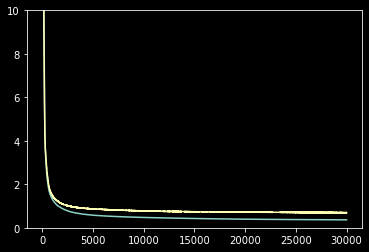

In [218]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim(0,10)

In [219]:
model.evaluate(X_train, y_train), model.evaluate(X_test, y_test)

55/55 [==============================] - 0s 831us/step - loss: 0.6932 - accuracy: 0.7516


([0.3665034770965576, 0.8244175910949707],
 [0.6931737661361694, 0.7515813708305359])

In [224]:
logitdf

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,GroupRank,GroupSize,Cabin_number,Total_purchases,Name_length,first_name_length,...,Cabin_side_S,CryoSleep_is_null,Age_is_null,VIP_is_null,RoomService_is_null,FoodCourt_is_null,ShoppingMall_is_null,Spa_is_null,VRDeck_is_null,Transported_is_null,Cabin_number_is_null,Total_purchases_is_null,Name_length_is_null,first_name_length_is_null,second_name_length_is_null
0,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,1.0,1.0,1.0,0.0,736.0,2.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,0.0,1.0,2.0,0.0,10383.0,2.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,0.0,2.0,2.0,0.0,5176.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,1.0,1.0,1091.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12965,1.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1496.0,0.0,2.0,5.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12966,0.0,42.0,0.0,0.0,847.0,17.0,10.0,144.0,0.0,1.0,1.0,0.0,1018.0,2.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
12967,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,296.0,0.0,2.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12968,0.0,0.0,0.0,0.0,2680.0,0.0,0.0,523.0,0.0,1.0,1.0,297.0,3203.0,2.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
model.predict()

# Identically process just the submission data

In [380]:
# do all ids adhere to the format gggg_pp
df_test['PassengerId_format_ok'] = df_test['PassengerId'].apply(lambda this_id: int(this_id[:4]) < 10000 and int(this_id[-2:]) < 100 and this_id[4] == '_')

In [381]:
#make column for passenger group
df_test['Group'] = df_test['PassengerId'].apply(lambda this_id: int(this_id[:4]))

In [382]:
#make column for passenger number in group
df_test['GroupRank'] = df_test['PassengerId'].apply(lambda this_id: this_id[-2:])

In [383]:
#make grouprank a number
df_test['GroupRank'] = df_test['GroupRank'].apply(lambda this_rank: int(this_rank))


df_test['GroupSize'] = df_test['Group'].apply(lambda this_group: int(group_value_counts[this_group]) )

In [384]:
df_test['Cabin_deck'] = df_test['Cabin'].apply(lambda this_cabin: this_cabin.split('/')[0] if type(this_cabin) == str else np.nan)
df_test['Cabin_number'] = df_test['Cabin'].apply(lambda this_cabin: int(this_cabin.split('/')[1]) if type(this_cabin) == str else np.nan)
df_test['Cabin_side'] = df_test['Cabin'].apply(lambda this_cabin: this_cabin.split('/')[2] if type(this_cabin) == str else np.nan)

In [385]:
# make a new column
df_test['Total_purchases'] = df_test['RoomService'] + df_test['FoodCourt'] + df_test['ShoppingMall'] + df_test['Spa'] + df_test['VRDeck']

In [386]:
df_test['Name_length'] = df_test['Name'].apply(lambda this_name: len(this_name.split()) if type(this_name) == str else np.nan)

In [387]:
df_test['first_name'] = df_test['Name'].apply(lambda this_name: this_name.split()[0] if type(this_name) == str else np.nan)
df_test['second_name'] = df_test['Name'].apply(lambda this_name: this_name.split()[1] if type(this_name) == str else np.nan)

df_test['first_name_length'] = df_test['first_name'].apply(lambda this_name: len(this_name) if type(this_name) ==  str else np.nan)
df_test['second_name_length'] = df_test['second_name'].apply(lambda this_name: len(this_name) if type(this_name) == str else np.nan)

In [388]:
logitdf_test = pd.get_dummies(df_test, columns = ['Destination', 'HomePlanet','Cabin_deck', 'Cabin_side'], drop_first = True).drop(columns = ['PassengerId', 'Cabin', 'Name', 'first_name', 'second_name', 'PassengerId_format_ok', 'Group'])

In [389]:
logitdf_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CryoSleep                  4184 non-null   object 
 1   Age                        4186 non-null   float64
 2   VIP                        4184 non-null   object 
 3   RoomService                4195 non-null   float64
 4   FoodCourt                  4171 non-null   float64
 5   ShoppingMall               4179 non-null   float64
 6   Spa                        4176 non-null   float64
 7   VRDeck                     4197 non-null   float64
 8   GroupRank                  4277 non-null   int64  
 9   GroupSize                  4277 non-null   int64  
 10  Cabin_number               4177 non-null   float64
 11  Total_purchases            3822 non-null   float64
 12  Name_length                4183 non-null   float64
 13  first_name_length          4183 non-null   f

In [390]:
logitdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12970 entries, 0 to 12969
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CryoSleep                   12970 non-null  float32
 1   Age                         12970 non-null  float32
 2   VIP                         12970 non-null  float32
 3   RoomService                 12970 non-null  float32
 4   FoodCourt                   12970 non-null  float32
 5   ShoppingMall                12970 non-null  float32
 6   Spa                         12970 non-null  float32
 7   VRDeck                      12970 non-null  float32
 8   GroupRank                   12970 non-null  float32
 9   GroupSize                   12970 non-null  float32
 10  Cabin_number                12970 non-null  float32
 11  Total_purchases             12970 non-null  float32
 12  Name_length                 12970 non-null  float32
 13  first_name_length           129

In [391]:
null_columns = [column for column in logitdf.columns if column[-8:] == '_is_null' and column[:4] != 'Tran']
null_columns

['CryoSleep_is_null',
 'Age_is_null',
 'VIP_is_null',
 'RoomService_is_null',
 'FoodCourt_is_null',
 'ShoppingMall_is_null',
 'Spa_is_null',
 'VRDeck_is_null',
 'Cabin_number_is_null',
 'Total_purchases_is_null',
 'Name_length_is_null',
 'first_name_length_is_null',
 'second_name_length_is_null']

In [392]:
for column in null_columns:
    logitdf_test[column] = logitdf_test[column[:-8]].isna()
    

In [393]:
logitdf_test = logitdf_test.astype('float32')
logitdf_test.fillna(0, inplace=True)

In [394]:
logitdf_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4277 entries, 0013_01 to 9277_01
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CryoSleep                   4277 non-null   float32
 1   Age                         4277 non-null   float32
 2   VIP                         4277 non-null   float32
 3   RoomService                 4277 non-null   float32
 4   FoodCourt                   4277 non-null   float32
 5   ShoppingMall                4277 non-null   float32
 6   Spa                         4277 non-null   float32
 7   VRDeck                      4277 non-null   float32
 8   GroupRank                   4277 non-null   float32
 9   GroupSize                   4277 non-null   float32
 10  Cabin_number                4277 non-null   float32
 11  Total_purchases             4277 non-null   float32
 12  Name_length                 4277 non-null   float32
 13  first_name_length           4

In [395]:
logitdf = logitdf[X_train.columns]

In [396]:
list(zip(X_train.columns, logitdf_test.columns))

[('CryoSleep', 'CryoSleep'),
 ('Age', 'Age'),
 ('VIP', 'VIP'),
 ('RoomService', 'RoomService'),
 ('FoodCourt', 'FoodCourt'),
 ('ShoppingMall', 'ShoppingMall'),
 ('Spa', 'Spa'),
 ('VRDeck', 'VRDeck'),
 ('GroupRank', 'GroupRank'),
 ('GroupSize', 'GroupSize'),
 ('Cabin_number', 'Cabin_number'),
 ('Total_purchases', 'Total_purchases'),
 ('Name_length', 'Name_length'),
 ('first_name_length', 'first_name_length'),
 ('second_name_length', 'second_name_length'),
 ('Destination_PSO J318.5-22', 'Destination_PSO J318.5-22'),
 ('Destination_TRAPPIST-1e', 'Destination_TRAPPIST-1e'),
 ('HomePlanet_Europa', 'HomePlanet_Europa'),
 ('HomePlanet_Mars', 'HomePlanet_Mars'),
 ('Cabin_deck_B', 'Cabin_deck_B'),
 ('Cabin_deck_C', 'Cabin_deck_C'),
 ('Cabin_deck_D', 'Cabin_deck_D'),
 ('Cabin_deck_E', 'Cabin_deck_E'),
 ('Cabin_deck_F', 'Cabin_deck_F'),
 ('Cabin_deck_G', 'Cabin_deck_G'),
 ('Cabin_deck_T', 'Cabin_deck_T'),
 ('Cabin_side_S', 'Cabin_side_S'),
 ('CryoSleep_is_null', 'CryoSleep_is_null'),
 ('Age_is_nu

In [397]:
logitdf_test['Transported_is_null'] = 0

In [398]:
logitdf_test = logitdf_test[X_train.columns]

In [399]:
list(zip(X_train.columns, logitdf_test.columns))

[('CryoSleep', 'CryoSleep'),
 ('Age', 'Age'),
 ('VIP', 'VIP'),
 ('RoomService', 'RoomService'),
 ('FoodCourt', 'FoodCourt'),
 ('ShoppingMall', 'ShoppingMall'),
 ('Spa', 'Spa'),
 ('VRDeck', 'VRDeck'),
 ('GroupRank', 'GroupRank'),
 ('GroupSize', 'GroupSize'),
 ('Cabin_number', 'Cabin_number'),
 ('Total_purchases', 'Total_purchases'),
 ('Name_length', 'Name_length'),
 ('first_name_length', 'first_name_length'),
 ('second_name_length', 'second_name_length'),
 ('Destination_PSO J318.5-22', 'Destination_PSO J318.5-22'),
 ('Destination_TRAPPIST-1e', 'Destination_TRAPPIST-1e'),
 ('HomePlanet_Europa', 'HomePlanet_Europa'),
 ('HomePlanet_Mars', 'HomePlanet_Mars'),
 ('Cabin_deck_B', 'Cabin_deck_B'),
 ('Cabin_deck_C', 'Cabin_deck_C'),
 ('Cabin_deck_D', 'Cabin_deck_D'),
 ('Cabin_deck_E', 'Cabin_deck_E'),
 ('Cabin_deck_F', 'Cabin_deck_F'),
 ('Cabin_deck_G', 'Cabin_deck_G'),
 ('Cabin_deck_T', 'Cabin_deck_T'),
 ('Cabin_side_S', 'Cabin_side_S'),
 ('CryoSleep_is_null', 'CryoSleep_is_null'),
 ('Age_is_nu

In [401]:
test_preds = model.predict(logitdf_test)

134/134 [==============================] - 0s 589us/step


In [411]:
test_preds = list(map(lambda x: np.argmax(x), test_preds))

In [412]:
submission = pd.DataFrame(test_preds, index=logitdf_test.index, columns = ['Transported'])
submission

,Transported
PassengerId,
0013_01,1
0018_01,0
0019_01,1
0021_01,1
0023_01,1
...,...
9266_02,1
9269_01,0
9271_01,1


In [421]:
submission = submission.astype(bool)

In [422]:
submission.to_csv('submission.csv')

## NN, but don't overfit

In [424]:
callback = keras.callbacks.EarlyStopping(patience = 5)

history = model.fit(X_train,
                        y_train,
                        validation_data=(X_test, y_test),
                        batch_size = 256,
                        epochs = 30000,
                        verbose = False,
                        callbacks = [callback]
                       )

In [433]:
test_preds2 = model.predict(logitdf_test)

134/134 [==============================] - 0s 612us/step


In [434]:
test_preds2 = list(map(lambda x: np.argmax(x), test_preds2))

In [435]:
submission2 = pd.DataFrame(test_preds2, index=logitdf_test.index, columns = ['Transported'])
submission2 = submission2.astype(bool)
submission2

,Transported
PassengerId,
0013_01,True
0018_01,False
0019_01,True
0021_01,True
0023_01,True
...,...
9266_02,True
9269_01,False
9271_01,True


In [436]:
submission2.to_csv('submission2.csv')